In [1]:
from online_experts import *

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
actual_values = np.random.randint(0,10,size=[40])
def create_expert(std,actual_values):
    return actual_values+np.random.randn(actual_values.size)*std
# Fixed Standard Deviations for each expert
stds = [1,0.1,0.03,0.5,1.3,2,5,1,2,5]
expert_predictions = np.array([create_expert(std,actual_values) for std in stds])

In [4]:
expert_predictions.shape

(10, 40)

In [5]:
actual_values

array([8, 5, 7, 2, 1, 4, 4, 7, 2, 9, 8, 9, 1, 8, 4, 9, 7, 7, 8, 1, 9, 3,
       3, 9, 8, 2, 6, 5, 6, 3, 3, 9, 4, 9, 4, 6, 9, 6, 3, 0])

# Doubling Test

In [6]:
test1 = OnlineHedgeDoubling(n=10,T=50,loss_func=se)

In [7]:
test1._update(expert_predictions[:,:20],actual_values[:20])

In [8]:
predictions = []
for i in range(21,40):
    predictions.append(np.dot(test1._predict(expert_predictions[:,i]),expert_predictions[:,i]))
    test1._update(expert_predictions[:,i][:,np.newaxis],actual_values[i,np.newaxis])

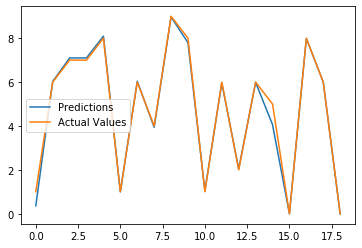

In [9]:
plt.plot(predictions,label="Predictions")
plt.plot(actual_values[21:40],label="Actual Values")
plt.legend()

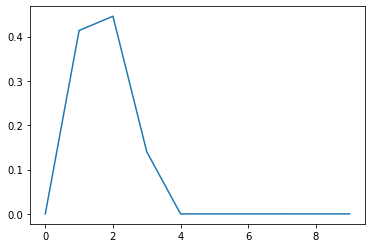

In [28]:
plt.plot(test1.weights)

# Incremental Test

In [11]:
test2 = OnlineHedgeIncrementalTime(n=10,loss_func=se)

In [12]:
test2._update(expert_predictions[:,:20],actual_values[:20])

In [13]:
predictions = []
for i in range(21,40):
    predictions.append(np.dot(test2._predict(expert_predictions[:,i]),expert_predictions[:,i]))
    test2._update(expert_predictions[:,i][:,np.newaxis],actual_values[i,np.newaxis])

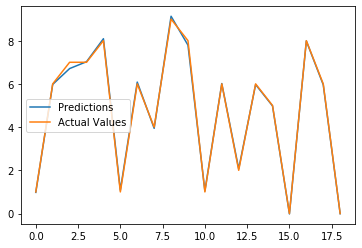

In [14]:
plt.plot(predictions,label="Predictions")
plt.plot(actual_values[21:40],label="Actual Values")
plt.legend()

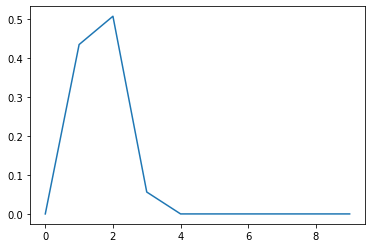

In [27]:
plt.plot(test2.weights)

# Normal Hedge

https://arxiv.org/pdf/math/0602629.pdf

https://cseweb.ucsd.edu/~yfreund/papers/nhedge.pdf

1.0222632139986949e+21
0.1475721194796149
-0.8197382352552118
-0.49372524557783537
-0.23403159990639244
-0.06294947539355089
0.036629722777504536
-0.01447521616657399
0.010736067644581127
-0.0019532810458593453
0.004370270851739022
0.0012032389415796985
-0.0003763319771556972
0.0004131253685035752
1.8314715097833556e-05
-0.00017902912019573947
-8.036232558739087e-05
-3.102508609797994e-05
-6.355505724808808e-06
5.979524629218247e-06
-1.8801056178574527e-07
2.8957520301631234e-06
1.353869483189385e-06
5.829291485071053e-07
1.9745921475688988e-07
4.724307611780887e-09
-9.16431317499189e-08
1.006591596195188e+21
-0.2266815458234599
7.510866043511244
1.1200233106290494
0.26096364598258814
-0.013445603098929393
0.11469879136014915
0.048563213441412234
0.01706572061106204
0.0016894948350363315
-0.005907864897872539
-0.002116678642048342
-0.00021547045211667282
0.0007365419091098779
0.00026041823864497715
2.2444530886733816e-05
-9.6520299949443e-05
-3.703971952218055e-05
-7.298053085857958e-0

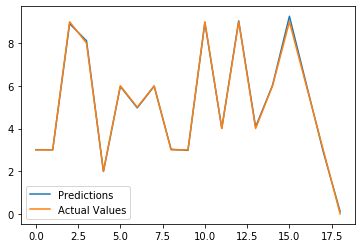

In [6]:
test3 = NormalHedge(n=10,loss_func=se)
test3._update(expert_predictions[:,:1],actual_values[:1])
predictions = []
for i in range(21,40):
    predictions.append(np.dot(test3._predict(expert_predictions[:,i]),expert_predictions[:,i]))
    test3._update(expert_predictions[:,i][:,np.newaxis],actual_values[i,np.newaxis])
plt.plot(predictions,label="Predictions")
plt.plot(actual_values[21:40],label="Actual Values")
plt.legend()

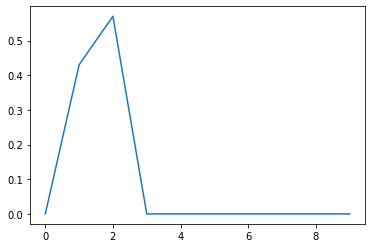

In [7]:
plt.plot(test3.weights)